In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('causes_of_death.tsv', delimiter='\t')

In [3]:
df.head(2)

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5


1) Groupby State and Gender. Sum the values.

In [6]:
df.groupby(['State','Gender']).sum().head()

Notes  State Code  Deaths
State   Gender                           
Alabama Female    0.0          40  430133
        Male      0.0          41  430647
Alaska  Female    0.0          80   27199
        Male      0.0          84   36135
Arizona Female    0.0         180  396028

2) Groupby State and Gender and Race. Find the average values.

In [7]:
df.groupby(['State','Gender','Race']).mean().head()

Notes  State Code  \
State   Gender Race                                                  
Alabama Female American Indian or Alaska Native    NaN         1.0   
               Asian or Pacific Islander           NaN         1.0   
               Black or African American           NaN         1.0   
               White                               NaN         1.0   
        Male   American Indian or Alaska Native    NaN         1.0   

                                                       Deaths  
State   Gender Race                                            
Alabama Female American Indian or Alaska Native     70.875000  
               Asian or Pacific Islander            95.500000  
               Black or African American          9074.000000  
               White                             29890.636364  
        Male   American Indian or Alaska Native     86.375000

3) Groupby Gender and Race. Find the minimum values.

In [8]:
df.groupby(['Gender','Race']).min().head()

Notes    State  State Code  \
Gender Race                                                           
Female American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   
Male   American Indian or Alaska Native    NaN  Alabama           1   

                                        Ten-Year Age Groups  \
Gender Race                                                   
Female American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   
Male   American Indian or Alaska Native           1-4 years   

                                        Ten-Year Age Groups Code Gender Code  \
Gender Race                                                                    
Female American Indian or Alaska Native                        1           F   
       Asian or Pacific Islander                               1           F   
       Black or African American                               1           F   
       White                                                   1           F   
Male   American Indian or Alaska Native                        1           M   

                                        Race Code  Deaths Population  \
Gender Race                                                            
Female American Indian or Alaska Native    1002-5      10     100285   
       Asian or Pacific Islander             A-PI      10     100371   
       Black or African American           2054-5      10     100170   
       White                               2106-3      12    1000704   
Male   American Indian or Alaska Native    1002-5      10       1001   

                                        Crude Rate  
Gender Race                                         
Female American Indian or Alaska Native       10.4  
       Asian or Pacific Islander              10.1  
       Black or African American             100.3  
       White                                  10.1  
Male   American Indian or Alaska Native    10000.0

4) Create a bar chart of the total number of deaths by state.
Sort your columns in order (ascending or descending are both acceptable).
Also make sure to include a title, axes labels and have your graph be an appropriate size.
NOTE: In order to do this, slice the Deaths column after the .groupby() method, but before the sum() method. You can even chain the .plot() call on after the sum() call and do this all on one line, excluding the labeling of the graph!

Text(0.5, 0, 'Number of Deaths')

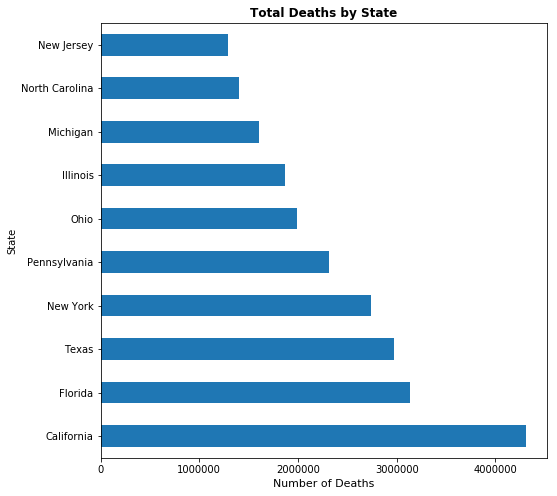

In [35]:
df.groupby('State')['Deaths'].sum().sort_values(ascending=False)[0:10].plot(kind='barh',figsize=(8,8))
plt.title('Total Deaths by State',fontweight='bold')
plt.xlabel("Number of Deaths",fontsize=11)

In the cell below, get the .info() of our DataFrame, and note the data type that each column is currently stored as.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4115 non-null object
State Code                  4115 non-null int64
Ten-Year Age Groups         4115 non-null object
Ten-Year Age Groups Code    4115 non-null object
Gender                      4115 non-null object
Gender Code                 4115 non-null object
Race                        4115 non-null object
Race Code                   4115 non-null object
Deaths                      4115 non-null int64
Population                  4115 non-null object
Crude Rate                  4115 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


In the cell below, display the population values for the first 5 rows in the DataFrame.

In [41]:
df.iloc[0:5]['Population']

0      3579
1      7443
2    169339
3    347921
4      7366
Name: Population, dtype: object

In the cell below, print out the top 5 value_counts() of the population column of the DataFrame.

In [46]:
df['Population'].value_counts()[0:5]

Not Applicable    75
30070              2
2816               2
2108               2
2777               2
Name: Population, dtype: int64

In the cell below:

Slice the rows of df where the Population column is equal to 'Not Applicable'.
Use to_drop.index to drop the offending rows from df. Be sure to set the axis=0, and inplace=True
Cast the Population column to an integer data type using the .astype() function, with the single parameter int64 passed in.
Print the Population column's dtype attribute to confirm it is now stored in int64 format.
NOTE: .astype() returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it!

In [52]:
to_drop = df[df['Population'] == 'Not Applicable']
df.drop(to_drop.index, axis=0, inplace=True)
df.Population = df.Population.astype('int64')
print(df.Population.dtype)

int64


Now that we've reformatted our data, let's create a bar chart of the of the Mean Population by State.

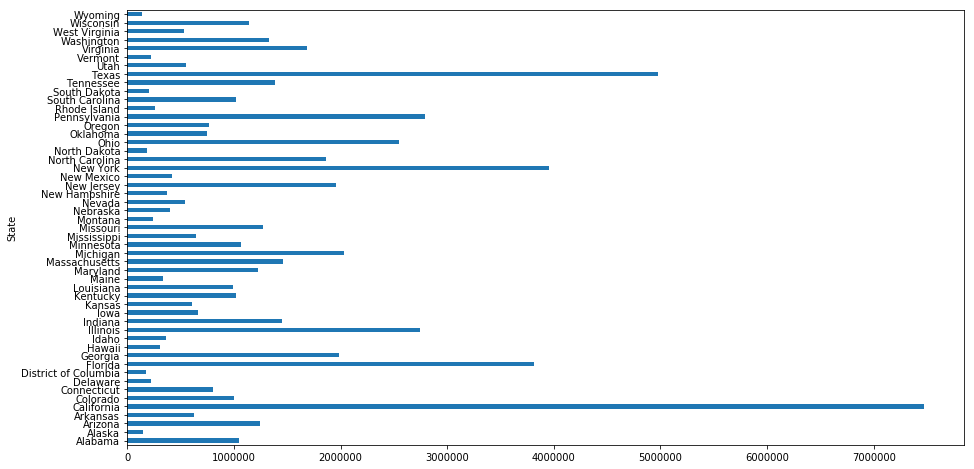

In [53]:
df.groupby('State')['Population'].mean().plot(kind='barh', figsize=(15,8))

Group df by 'State' and  'Gender', and then slice both 'Deaths' and 'Population' from it. Chain the .agg() method to return the mean, min, max, and standard deviation these sliced columns.
NOTE: This only requires one line of code.

In [54]:
grouped = df.groupby(['State', 'Gender'])['Deaths', 
                                          'Population'].agg(['mean', 
                                                             'min', 'max', 'std'])
grouped.head()

Deaths                              Population         \
                        mean min     max           std          mean    min   
State   Gender                                                                
Alabama Female  10753.325000  10  116297  24612.250487  1.078713e+06   2087   
        Male    10765.850000  10   88930  20813.538537  1.014946e+06   1129   
Alaska  Female    679.975000  13    4727   1154.870455  1.440403e+05   1224   
        Male      860.357143  12    5185   1411.777392  1.518884e+05    578   
Arizona Female   8998.386364  21  133923  26245.941003  1.246502e+06  12211   

                                       
                    max           std  
State   Gender                         
Alabama Female  4334752  1.400309e+06  
        Male    4284775  1.397830e+06  
Alaska  Female   682855  2.015793e+05  
        Male     770502  2.238843e+05  
Arizona Female  6265346  2.096632e+06

In the cell below, display the index attribute of this DataFrame.

In [56]:
grouped.index

MultiIndex(levels=[['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], ['Female', 'Male']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 3

In the cell below, call the DataFrame's reset_index() function. Then, display the head of the DataFrame.

In [58]:
grouped = grouped.reset_index()
grouped.head()

State  Gender        Deaths                              Population  \
                            mean min     max           std          mean   
0  Alabama  Female  10753.325000  10  116297  24612.250487  1.078713e+06   
1  Alabama    Male  10765.850000  10   88930  20813.538537  1.014946e+06   
2   Alaska  Female    679.975000  13    4727   1154.870455  1.440403e+05   
3   Alaska    Male    860.357143  12    5185   1411.777392  1.518884e+05   
4  Arizona  Female   8998.386364  21  133923  26245.941003  1.246502e+06   

                                 
     min      max           std  
0   2087  4334752  1.400309e+06  
1   1129  4284775  1.397830e+06  
2   1224   682855  2.015793e+05  
3    578   770502  2.238843e+05  
4  12211  6265346  2.096632e+06

In [59]:
grouped.index

RangeIndex(start=0, stop=102, step=1)

In the cell below, examine the columns attribute of grouped to confirm this.

In [60]:
grouped.columns

MultiIndex(levels=[['Deaths', 'Population', 'Gender', 'State'], ['mean', 'min', 'max', 'std', '']],
           codes=[[3, 2, 0, 0, 0, 0, 1, 1, 1, 1], [4, 4, 0, 1, 2, 3, 0, 1, 2, 3]])

In the cell below, use the get_level_values method contained within the DataFrame's columns object to get the values for the outermost layer of the index.

In [61]:
grouped.columns.get_level_values(0)

Index(['State', 'Gender', 'Deaths', 'Deaths', 'Deaths', 'Deaths', 'Population',
       'Population', 'Population', 'Population'],
      dtype='object')

In [62]:
grouped.columns.get_level_values(1)

Index(['', '', 'mean', 'min', 'max', 'std', 'mean', 'min', 'max', 'std'], dtype='object')

In the cell below, call the DataFrame's pivot method with the following parameters:

index = 'State'
columns = 'Gender'
values = 'Deaths_mean'
Then, display the head of our new pivot DataFrame to see what it looks like.